## Analyze SHARPs dataset

Plots some SHARPs parameters and adds flare labels to index.

### Imports and functions

In [25]:
from datetime import datetime,timedelta
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sunpy.net import Fido
from sunpy.net import attrs as a
import tqdm

### Read in index files

In [26]:
sharps_indexes = []
for index_file in sorted(glob.glob('../data/index_[0-9]**.csv')):
    print(index_file)
    next_index = pd.read_csv(index_file)
    sharps_indexes.append(next_index)
sharps_index = pd.concat(sharps_indexes,ignore_index=True)
# remove SHARPs without an associated AR
sharps_index = sharps_index[sharps_index['noaa_ars'].notna()]
sharps_index.head()



../data/index_0_5000.csv
../data/index_5000_10000.csv


,file,sample_time,br_file,blos_file,naxis1,naxis2,t_obs,t_rec,origin,date,...,lat_fwt,noaa_ar,noaa_ars,usfluxl,meangbl,missvals,datamin,datamax,datamedn,datamean
0,/d0/kvandersande/sharps_hdf5/hmi.sharp_cea_720...,2010-05-01 07:48:03.860,/d0/kvandersande/sharps/sharp_1/hmi.sharp_cea_...,/d0/kvandersande/sharps/sharp_1/hmi.sharp_cea_...,580,265,2010.05.01_07:48:03.860_TAI,2010.05.01_07:48:00.000_TAI,SDO/JSOC-SDP,2018-04-20T20:29:02.000,...,23.810165,11067,11067,2.376075e+21,10.670333,3902.0,-1408.60999,1419.29004,-8.662315,0.103898
1,/d0/kvandersande/sharps_hdf5/hmi.sharp_cea_720...,2010-05-03 07:48:04.114,/d0/kvandersande/sharps/sharp_1/hmi.sharp_cea_...,/d0/kvandersande/sharps/sharp_1/hmi.sharp_cea_...,580,265,2010.05.03_07:48:04.114_TAI,2010.05.03_07:48:00.000_TAI,SDO/JSOC-SDP,2018-04-20T21:19:35.000,...,23.560297,11067,11067,5.077353e+21,18.540165,0.0,-2008.47998,1849.40002,10.731854,17.393345
2,/d0/kvandersande/sharps_hdf5/hmi.sharp_cea_720...,2010-05-03 23:48:04.079,/d0/kvandersande/sharps/sharp_1/hmi.sharp_cea_...,/d0/kvandersande/sharps/sharp_1/hmi.sharp_cea_...,580,265,2010.05.03_23:48:04.079_TAI,2010.05.03_23:48:00.000_TAI,SDO/JSOC-SDP,2018-04-20T21:37:13.000,...,23.702551,11067,11067,5.285607e+21,19.634661,0.0,-1923.65002,1978.01001,5.658292,14.098642
3,/d0/kvandersande/sharps_hdf5/hmi.sharp_cea_720...,2010-05-01 15:48:03.687,/d0/kvandersande/sharps/sharp_1/hmi.sharp_cea_...,/d0/kvandersande/sharps/sharp_1/hmi.sharp_cea_...,580,265,2010.05.01_15:48:03.687_TAI,2010.05.01_15:48:00.000_TAI,SDO/JSOC-SDP,2018-04-20T20:36:50.000,...,23.913517,11067,11067,2.172610e+21,13.077928,0.0,-1328.58997,1549.04004,11.012257,21.134663
4,/d0/kvandersande/sharps_hdf5/hmi.sharp_cea_720...,2010-05-04 07:48:04.240,/d0/kvandersande/sharps/sharp_1/hmi.sharp_cea_...,/d0/kvandersande/sharps/sharp_1/hmi.sharp_cea_...,580,265,2010.05.04_07:48:04.240_TAI,2010.05.04_07:48:00.000_TAI,SDO/JSOC-SDP,2018-04-25T16:50:47.000,...,23.715008,11067,11067,5.240758e+21,19.229950,0.0,-1651.93994,1528.43005,8.441732,12.553595


### Plot distribution of SHARPs sizes

Text(0.5, 1.0, 'Distribution of SHARP sizes')

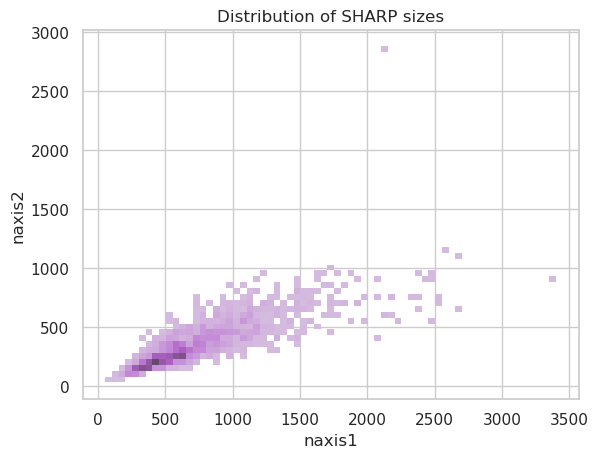

In [27]:
sns.set_theme('notebook',style='whitegrid',palette='rocket')
sns.histplot(sharps_index,x='naxis1',y='naxis2',binwidth=50)
plt.title('Distribution of SHARP sizes')

## Plot SHARPs parameter distributions

<Axes: xlabel='datamax', ylabel='Count'>

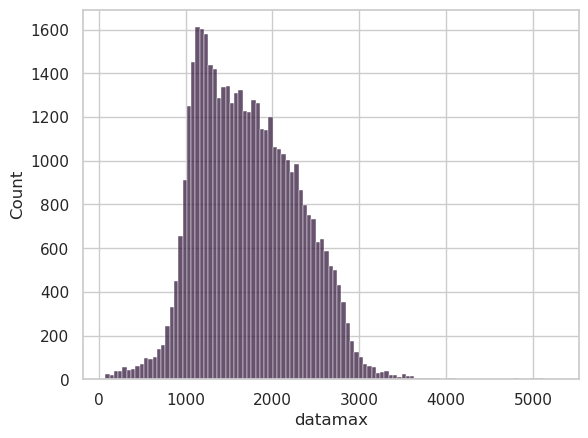

In [28]:
sns.histplot(sharps_index,x='datamax')

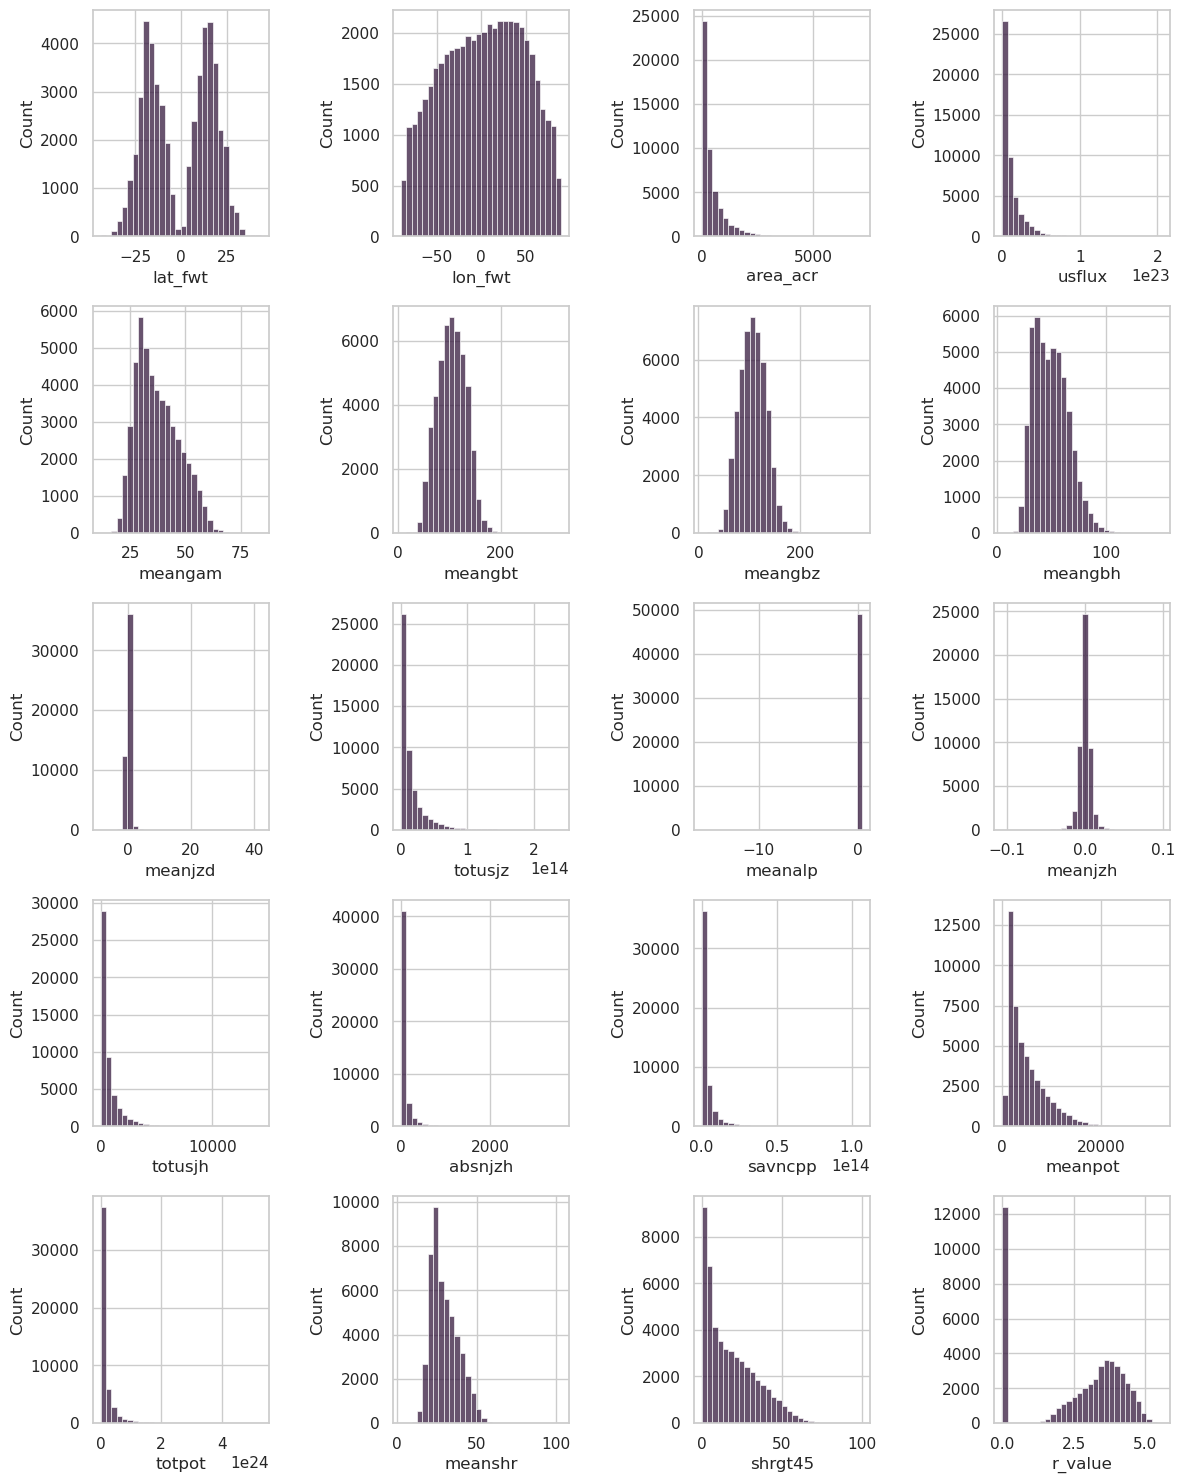

In [29]:
feats = ['lat_fwt','lon_fwt','area_acr','usflux','meangam','meangbt','meangbz','meangbh',
         'meanjzd','totusjz','meanalp','meanjzh','totusjh','absnjzh','savncpp','meanpot',
         'totpot','meanshr','shrgt45','r_value']    # SHARPs parameters
fig,ax = plt.subplots(5,4,figsize=(12,15))
ax = ax.flatten()
for i,feat in enumerate(feats):
    sns.histplot(sharps_index,x=feat,ax=ax[i],bins=30)

plt.tight_layout()

### Download flare catalog

In [34]:
# Query HEK for flare catalog
event_type = 'FL'
tstart = '2010/05/01'
tend = '2022/12/31'
result = Fido.search(a.Time(tstart,tend),a.hek.EventType(event_type),a.hek.FL.GOESCls>'C1.0',a.hek.OBS.Observatory=='GOES')

In [35]:
hek_results = result['hek']
print(hek_results.colnames)

['gs_thumburl', 'comment_count', 'hpc_bbox', 'frm_humanflag', 'hgc_coord', 'event_coordsys', 'obs_levelnum', 'hpc_coord', 'event_npixels', 'gs_imageurl', 'ar_polarity', 'frm_paramset', 'hrc_coord', 'event_starttime', 'ar_mtwilsoncls', 'event_type', 'intensmin', 'fl_fluence', 'obs_meanwavel', 'frm_url', 'skel_chaincode', 'bound_chaincode', 'noposition', 'fl_fluenceunit', 'active', 'intensmax', 'frm_versionnumber', 'fl_peaktempunit', 'fl_halphaclass', 'area_uncert', 'obs_dataprepurl', 'hpc_geom', 'hgc_bbox', 'intensmedian', 'chaincodetype', 'obs_channelid', 'event_clippedspatial', 'ar_noaaclass', 'SOL_standard', 'event_avg_rating', 'eventtype', 'intensunit', 'hpc_boundcc', 'event_mapurl', 'frm_contact', 'ar_penumbracls', 'intensmean', 'bound_ccstartc1', 'frm_name', 'area_atdiskcenter', 'frm_identifier', 'obs_observatory', 'event_description', 'boundbox_c2ur', 'obs_firstprocessingdate', 'boundbox_c2ll', 'frm_institute', 'hrc_bbox', 'refs_orig', 'ar_mcintoshcls', 'event_maskurl', 'bound_cc

In [41]:
filtered_results = hek_results['event_starttime','event_peaktime','event_endtime','fl_goescls','ar_noaanum']
filtered_results.write('../data/hek_flare_catalog.csv',format='csv')

In [42]:
flares = pd.read_csv('../data/hek_flare_catalog.csv')
flares['CMX'] = flares['fl_goescls'].str[0]
flares['CMX_value'] = flares['fl_goescls'].str[1:]

In [45]:
flares['intensity'] = flares['CMX_value'].astype(float)*1e-6
flares.loc[flares['CMX']=='M','intensity'] = flares.loc[flares['CMX']=='M','intensity']*10
flares.loc[flares['CMX']=='X','intensity'] = flares.loc[flares['CMX']=='X','intensity']*100
flares.loc[flares['CMX']=='Y','intensity'] = flares.loc[flares['CMX']=='Y','intensity']*1000


In [51]:
flares=flares.rename(columns={'event_starttime':'start_time','event_peaktime':'peak_time','event_endtime':'end_time',
                'fl_goescls':'GOES_class','ar_noaanum':'AR'})
flares.to_csv('../data/hek_flare_catalog.csv')

### Add flare labels to index

In [30]:
flares = pd.read_csv('../data/hek_flare_catalog.csv')
flares['peak_time'] = pd.to_datetime(flares['peak_time'])
windows = [3,6,12,24,48]
sharps_index['sample_time'] = pd.to_datetime(sharps_index['sample_time'])

In [31]:
label_data = {}
for window in windows:
    label_data['C_flare_in_'+str(window)+'h'] = []
    label_data['M_flare_in_'+str(window)+'h'] = []
    label_data['X_flare_in_'+str(window)+'h'] = []
    label_data['flare_intensity_in_'+str(window)+'h'] = []

for i in sharps_index.index:
    sample = sharps_index.loc[i]
    sample_time = sample['sample_time']
    ars = np.array(str(sample['noaa_ars']).split(',')).astype(int)
    sharps_flares = flares[flares['AR'].isin(ars)]
    for window in windows:
        flare_data = sharps_flares[(sharps_flares['peak_time']>=sample_time)&
                        (sharps_flares['peak_time']<=sample_time+timedelta(hours=window))]
        label_data['C_flare_in_'+str(window)+'h'].append(sum(flare_data['CMX']=='C')>0)
        label_data['M_flare_in_'+str(window)+'h'].append(sum(flare_data['CMX']=='M')>0)
        label_data['X_flare_in_'+str(window)+'h'].append(sum(flare_data['CMX']=='X')>0)
        if len(flare_data)>0:
            label_data['flare_intensity_in_'+str(window)+'h'].append('{:0.1e}'.format(flare_data['intensity'].max()))
        else:
            label_data['flare_intensity_in_'+str(window)+'h'].append(0)



In [32]:
for key in label_data:
    sharps_index[key] = label_data[key]

In [33]:
sharps_index.to_csv('../data/index_sharps.csv',index=False)

In [34]:
print('>=C',sum(sharps_index['flare_intensity_in_24h'].astype(float)>=1e-6))
print('>=M',sum(sharps_index['flare_intensity_in_24h'].astype(float)>=1e-5))
print('total',len(sharps_index))


>=C 7729
>=M 1284
total 49552


In [35]:
print(sum(flares['intensity']>=9.9999999e-6))

1021
